# Setup

In [1]:
!pip install -q openai langchain chromadb faiss-cpu pypdf pdfplumber chromadb tiktoken docarray huggingface_hub sentence-transformers

In [2]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import os
os.getcwd()

'C:\\Users\\user\\Desktop\\GenerativeAI\\SemanticSpotter'

# Environment setup

In [4]:
!pip install -q openai langchain

In [5]:
import os
import openai

In [6]:
# Import the necessary libraies
import os
import openai

# Set the API key by reading the folder path. Use this code if you're running the code on Google Colab. Otherwise, use the actual folder path 
folder_path = 'C:/Users/user/Desktop/GenerativeAI/SemanticSpotter/'

# Folder path
os.chdir(folder_path)

# Read the text file containing the API key
with open(folder_path + "OpenAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

# Update the OpenAI API key by updating the environment variable
os.environ["OPENAI_API_KEY"] = openai.api_key

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

## **LangChain**?


LangChain is a framework that simplifies the development of LLM applications LangChain offers a suite of tools, components, and interfaces that simplify the construction of LLM-centric applications. LangChain enables developers to build applications that can generate creative and contextually relevant content LangChain provides an LLM class designed for interfacing with various language model providers, such as OpenAI, Cohere, and Hugging Face.

LangChain's versatility and flexibility enable seamless integration with various data sources, making it a comprehensive solution for creating advanced language model-powered applications.

LangChain's open-source framework is available to build applications in Python or JavaScript/TypeScript. Its core design principle is composition and modularity. By combining modules and components, one can quickly build complex LLM-based applications. LangChain is an open-source framework that makes it easier to build powerful and personalizeable applications with LLMs relevant to user’s interests and needs. It connects to external systems to access information required to solve complex problems. It provides abstractions for most of the functionalities needed for building an LLM application and also has integrations that can readily read and write data, reducing the development speed of the application. LangChains's framework allows for building applications that are agnostic to the underlying language model. With its ever expanding support for various LLMs, LangChain offers a unique value proposition to build applications and iterate continuosly.

LangChain framework consists of the following:
- **Components**: LangChain provides modular abstractions for the components necessary to work with language models. LangChain also has collections of implementations for all these abstractions. The components are designed to be easy to use, regardless of whether you are using the rest of the LangChain framework or not.
- **Use-Case Specific Chains**: Chains can be thought of as assembling these components in particular ways in order to best accomplish a particular use case. These are intended to be a higher level interface through which people can easily get started with a specific use case. These chains are also designed to be customizable.

The LangChain framework revolves around the following building blocks:
* Model I/O: Interface with language models (LLMs & Chat Models, Prompts, Output Parsers)
* Retrieval: Interface with application-specific data (Document loaders, Document transformers, Text embedding models, Vector stores, Retrievers)
* Chains: Construct sequences/chains of LLM calls
* Memory: Persist application state between runs of a chain
* Agents: Let chains choose which tools to use given high-level directives
* Callbacks: Log and stream intermediate steps of any chain



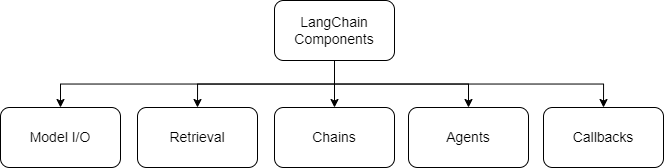

Why LangChain?

In the projects that you've covered in the program (ShopAssist AI, HelpMate AI etc.) you have undergone a trial-and-error method to build the application for the objective. In the course of this session, you will learn how to apply the many components of LangChain to build applications easily.

References:

[LangChain Python Documentation](https://python.langchain.com/docs/get_started/introduction)

[LangChain Python API Reference](https://api.python.langchain.com/en/latest/api_reference.html)


---



# 3. Data Connections and Retrieval

In addition to making API calls easier, LangChain also provides various methods to work with external documents efficiently.

Many LLM applications require user-specific data that is not part of the model's training set. The primary way of accomplishing this is through Retrieval Augmented Generation (RAG). In this process, external data is retrieved and then passed to the LLM when doing the generation step.

LangChain provides all the building blocks for RAG applications - from simple to complex. This section of the documentation covers everything related to the retrieval step - e.g. the fetching of the data. Although this sounds simple, it can be subtly complex. This encompasses several key modules.

The following methods provided by LangChain help process documents efficiently:
* Document Loaders
* Text Splitters
* Text Embedding
* Vector Stores
* Retrievers

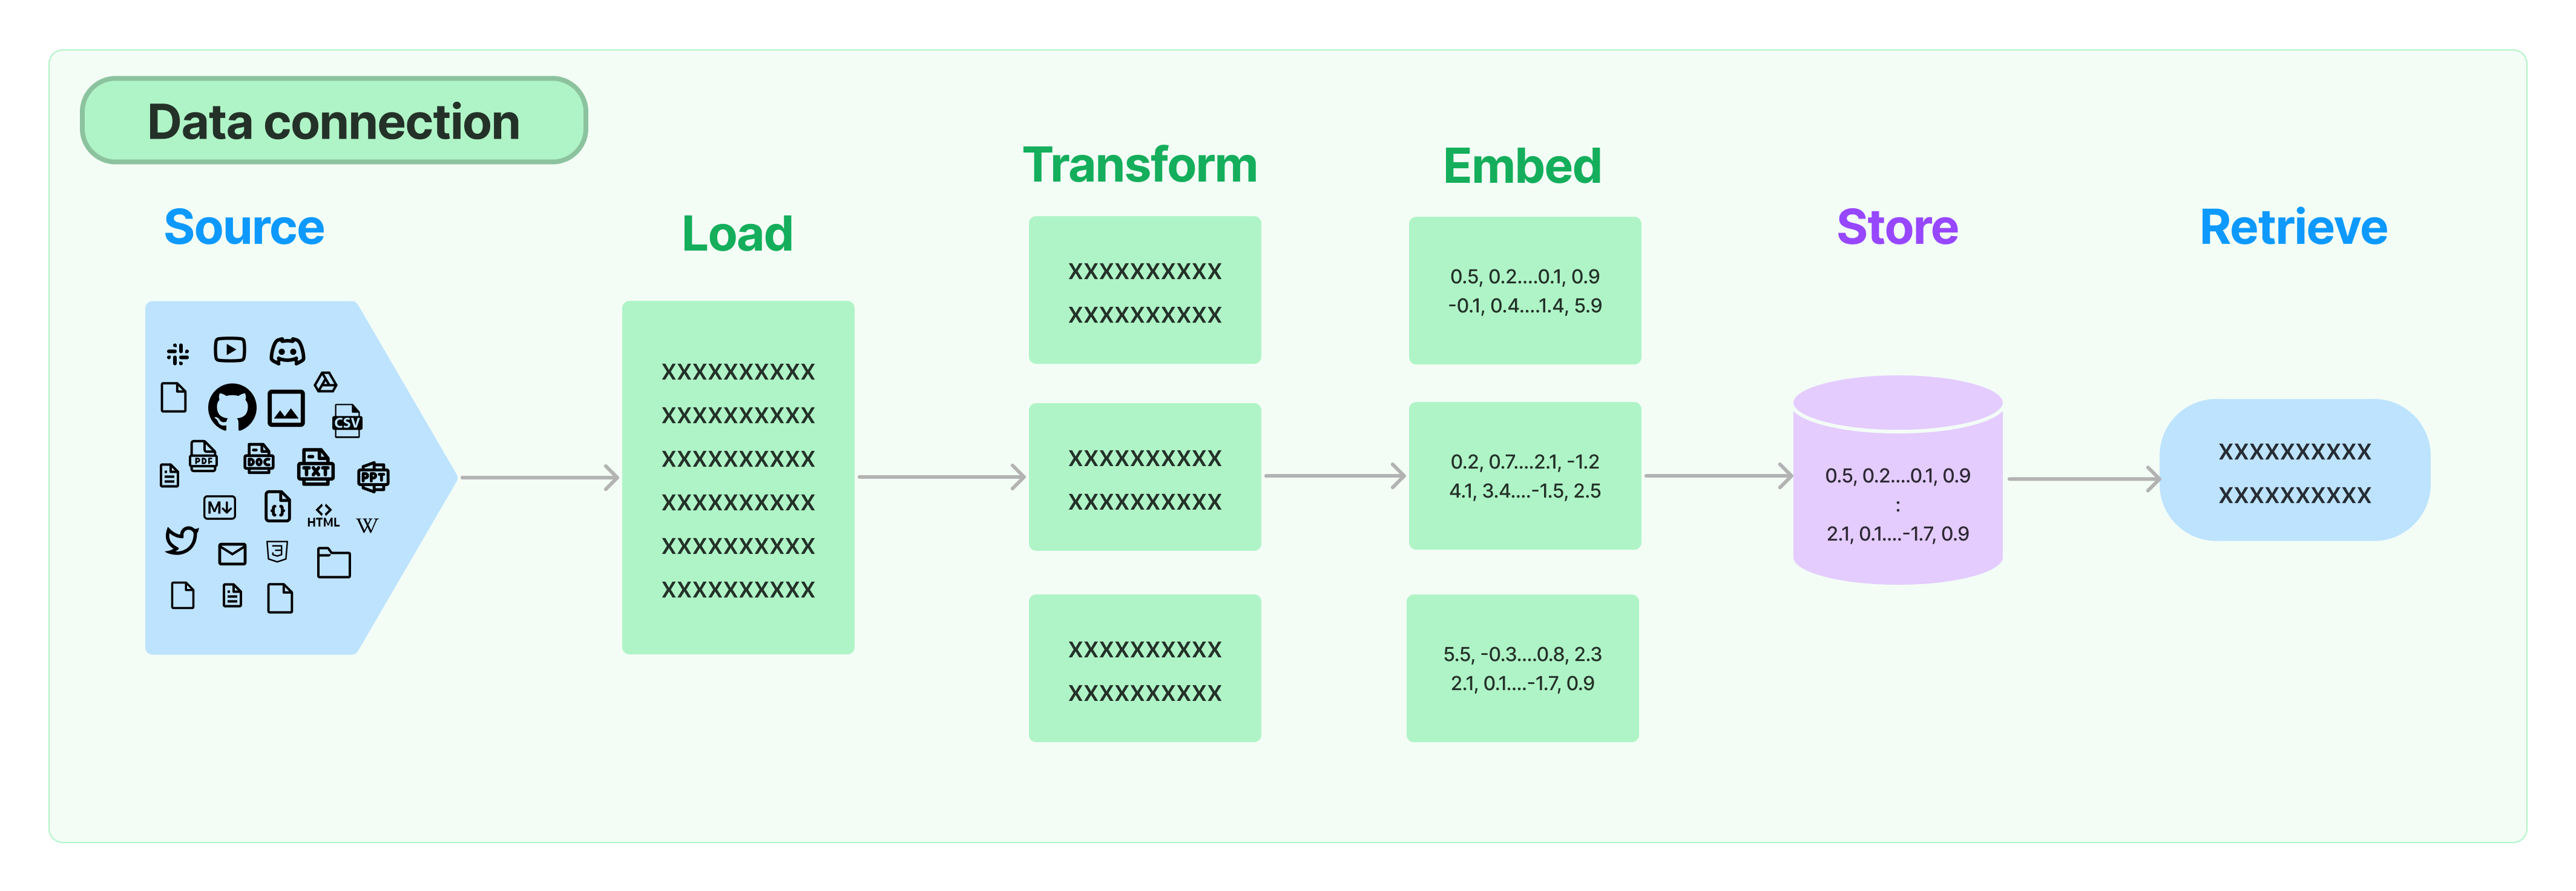

### **[Document Loaders](https://python.langchain.com/docs/modules/data_connection/document_loaders/)**


Document loaders provide an easy method to import data from different sources or formats as a DOcument, which contains the text content and the associated metadata.

Document Loaders load documents from different sources like HTML, PDF, text, etc., from various locations like cloud storage buckets and public websites. LangChain provides over 100 different document loaders as well as integrations with other major providers in the space, like AirByte and Unstructured. Refer to the official documentation for the complete list of supported [document loaders](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.document_loaders) in the API reference and the [official documentation](https://python.langchain.com/docs/integrations/document_loaders).

It should be noted that some document loaders require the associated libraries to be installed.


Document Schema:

LangChain defines a schema specially for working with Documents.  A Document is a piece of text and associated metadata. For example, there are document loaders for loading a simple .txt file, for loading the text contents of any web page, or even for loading a transcript of a YouTube video.

In [8]:
# Document Schema
from langchain.schema import Document

# Document object can contain the page_content and the metadata
document_1 = Document(page_content="XYZ",
         metadata={
             'my_document_id' : 1234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })
document_2 = Document(page_content="XYZ")
print(document_1, '\n\n' ,document_2)

page_content='XYZ' metadata={'my_document_id': 1234, 'my_document_source': 'The LangChain Papers', 'my_document_create_time': 1680013019} 

 page_content='XYZ'



Document loaders provide a "load" method for loading data as documents from a configured source. They optionally implement a "lazy load" as well for lazily loading data into memory.

PDF Documents

Langchain can load and parse PDF documents using various pdf connectors. We will see the PyPDFLoader to load documents into an array of documents. The document loader requires the python package of `pypdf` to be installed.

Each document contains the page content and metadata with the associated page number.

An added advantage of using PyPDFLoader is that the documents can be retrieved with page numbers.


In [9]:
# Install the necessary library for working with PyPDFLoader
!pip install PyPDF

In [10]:
# Import the PyPDFLoader class from LangChain
from langchain.document_loaders import PyPDFLoader
# Read the PDF data
pdf_loader = PyPDFLoader('C:/Users/user/Desktop/GenerativeAI/SemanticSpotter/PolicyDocuments/Principal-Sample-Life-Insurance-Policy.pdf')
# pages = pdf_loader.load()
pages = pdf_loader.load_and_split()
    # type(pages)
print(pages[0].page_content)
type(pages[0].page_content)

GROUP POLICY FOR:  
RHODE ISLAND JOHN DOE  
 
ALL MEMBERS  
Group Member Life Insurance  
 
Print Date: 07/16/2014  
 DOROTHEA GLAUSE  S655  
RHODE ISLAND JOHN DOE  01/01/2014  
711 HIGH STREET   
GEORGE RI 02903


str

Langchain also has loaders with specific functionality such as the document loader for Hacker News, which allows users to pull page data and comments from the social news website.

In [11]:
text1=pages[0].page_content
print(text1)

GROUP POLICY FOR:  
RHODE ISLAND JOHN DOE  
 
ALL MEMBERS  
Group Member Life Insurance  
 
Print Date: 07/16/2014  
 DOROTHEA GLAUSE  S655  
RHODE ISLAND JOHN DOE  01/01/2014  
711 HIGH STREET   
GEORGE RI 02903


### **Document Transformers/ Text Splitters**
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) to see which is best for you.

LangChain offers different text splitters for splitting the data such as:
* Split by Character
* Recursive Splitter
* Token Splitter

**Split by Character** - This is the simplest method. This splits based on characters (by default "\n\n") and measure chunk length by number of characters.
* How the text is split: by single character.
* How the chunk size is measured: by number of characters.

---
**Recursive Text Splitter** - This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.
* How the text is split: by list of characters.
* How the chunk size is measured: by number of characters.
---
**Split by tokens** - Language models have a token limit. You should not exceed the token limit. When you split your text into chunks it is therefore a good idea to count the number of tokens. There are many tokenizers. When you count tokens in your text you should use the same tokenizer as used in the language model.

In [12]:
# Import the CharacterTextSplitter
from langchain.text_splitter import CharacterTextSplitter

char_text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 100,
    chunk_overlap = 10
)
char_split_texts = char_text_splitter.create_documents([text1])

In [13]:
print (f"You have {len(char_split_texts)} documents")

You have 3 documents


RecursiveCharacterTextSplitter is generally preferred for working with generic texts as it recursively tries to split the text in order until the chunks are small enough. The default list is `["\n\n", "\n", " ", ""]`

In [14]:
# Import RecursiveCharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Set up the RecursiveCharacterTextSplitter instance for text splitting
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 100,
    chunk_overlap  = 20,
)

rec_split_texts = text_splitter.create_documents([text1])

In [15]:
print (f"You have {len(rec_split_texts)} documents")

You have 3 documents


In [16]:
print ("Text Preview:") # Preview the split texts and the character count
print (rec_split_texts[0].page_content,"-", len(rec_split_texts[0].page_content), "\n")
print (rec_split_texts[1].page_content,"-", len(rec_split_texts[1].page_content), "\n")
print (rec_split_texts[2].page_content,"-", len(rec_split_texts[2].page_content), "\n")


Text Preview:
GROUP POLICY FOR:  
RHODE ISLAND JOHN DOE  
 
ALL MEMBERS  
Group Member Life Insurance - 87 

Print Date: 07/16/2014  
 DOROTHEA GLAUSE  S655  
RHODE ISLAND JOHN DOE  01/01/2014 - 83 

711 HIGH STREET   
GEORGE RI 02903 - 34 



### [Text Embedding Models](https://python.langchain.com/docs/modules/data_connection/text_embedding/)

The Embeddings class is a class designed for interfacing with text embedding models. LangChain provides support for most of the embedding model providers (OpenAI, Cohere) including sentence transformers library from Hugging Face.

Embeddings create a vector representation of a piece of text and supports all the operations such as similarity search, text comparison, sentiment analysis etc.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query.

The first method takes as input multiple texts, while the second method returns the embedding representation for a single text.


In [17]:
# Installing tiktoken library for working with OpenAI's embedding model
!pip install tiktoken

In [18]:
# Import the OpenAI Embeddings class from LangChain
from langchain.embeddings import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()

C:\Users\user\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [19]:
embeddings = embeddings_model.embed_documents([rec_split_texts[0].page_content])
len(embeddings), len(embeddings[0])

(1, 1536)

In [20]:
type(embeddings)
# View the embeddings
# embeddings

list

### Vector Stores

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

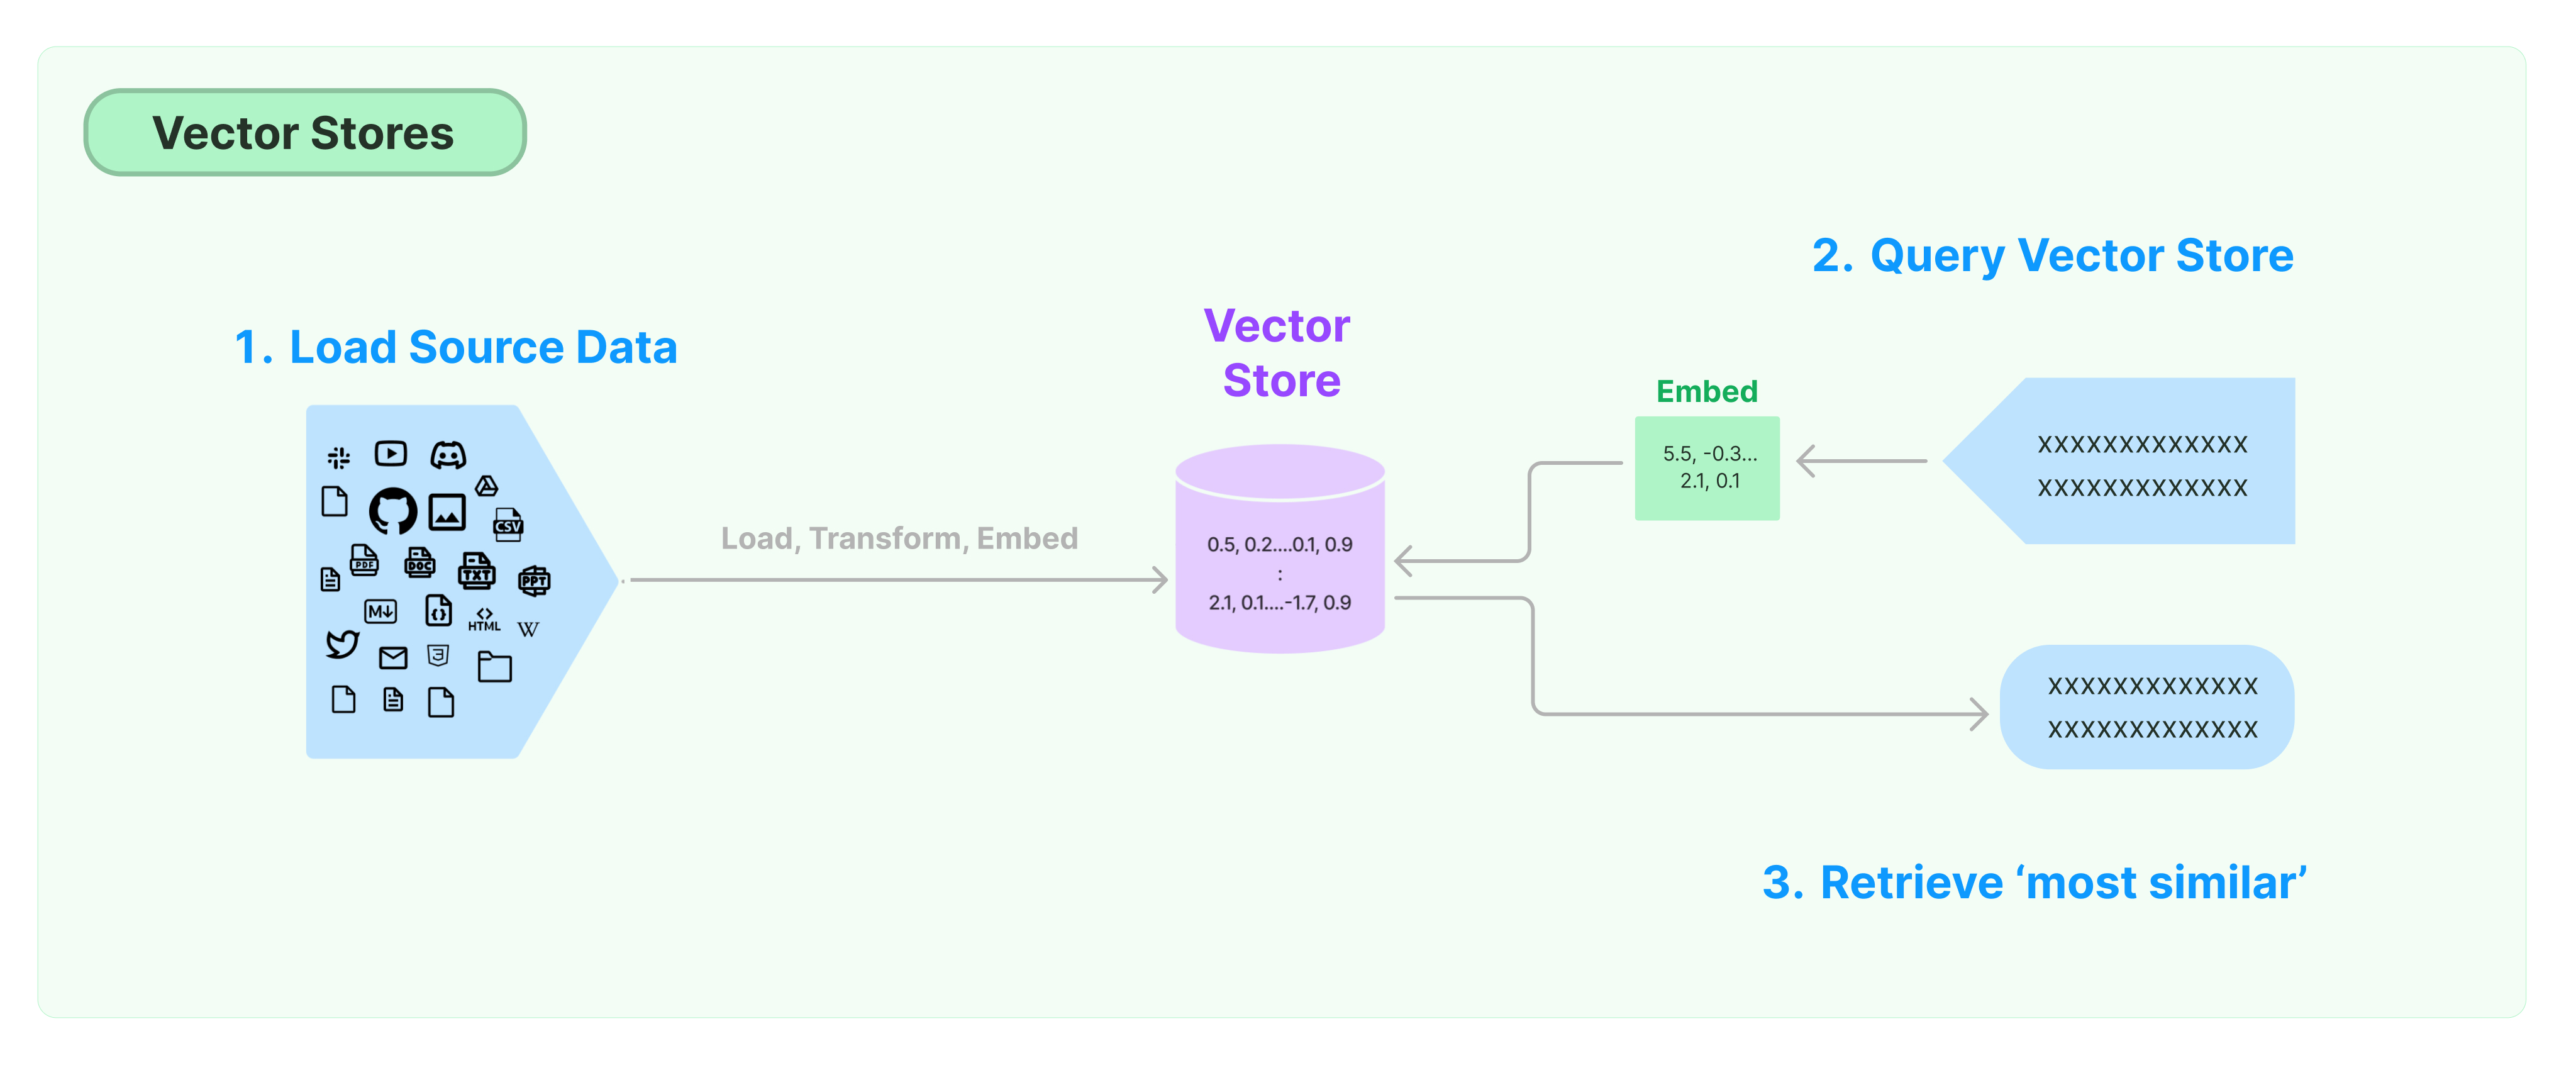

In [21]:
pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [22]:
# from langchain.vectorstores import Chroma
from langchain.vectorstores import FAISS
from langchain.vectorstores import Chroma

In [23]:
rec_split_texts

[Document(page_content='GROUP POLICY FOR:  \nRHODE ISLAND JOHN DOE  \n \nALL MEMBERS  \nGroup Member Life Insurance'),
 Document(page_content='Print Date: 07/16/2014  \n DOROTHEA GLAUSE  S655  \nRHODE ISLAND JOHN DOE  01/01/2014'),
 Document(page_content='711 HIGH STREET   \nGEORGE RI 02903')]

In [24]:
# Store the split document in ChromaDB
db = Chroma.from_documents(rec_split_texts, OpenAIEmbeddings())

Perform Similarity Search

In [25]:
query = "What is the proof of good health?"
docs = db.similarity_search(query)
print(docs[0].page_content)
print(docs[1].page_content)
print(docs[2].page_content)

Number of requested results 4 is greater than number of elements in index 3, updating n_results = 3


Print Date: 07/16/2014  
 DOROTHEA GLAUSE  S655  
RHODE ISLAND JOHN DOE  01/01/2014
GROUP POLICY FOR:  
RHODE ISLAND JOHN DOE  
 
ALL MEMBERS  
Group Member Life Insurance
711 HIGH STREET   
GEORGE RI 02903


LangChain also support all major vector stores and databases such as FAISS, ElasticSearch, LanceDB, Milvus, Pinecone etc. Refer to the [API documentation](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.vectorstores) for the complete list.

### **Retrievers**
Retrievers provide Easy way to combine documents with language models.


A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them. Retriever stores data for it to be queried by a language model. It provides an interface that will return documents based on an unstructured query. Vector stores can be used as the backbone of a retriever, but there are other types of retrievers as well.



There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever.

The [official documentation](https://python.langchain.com/docs/integrations/retrievers/) and [API reference](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.retrievers) contains a list of retriever integrations supported by LangChan.

In [26]:
# Import the FAISS class from the 'langchain.vectorstores' module for handling vector storage.
from langchain.vectorstores import FAISS
# Create an instance of the FAISS vector store to handle text embeddings and retrieval.
# It is designed to store and efficiently search for embeddings associated with texts.
# The 'texts' variable represents the texts you want to embed, and 'embeddings' represents the corresponding embeddings.
db = FAISS.from_documents(rec_split_texts, OpenAIEmbeddings())

In [27]:
# Initialize a document retriever using the existing vector storage (db).
# The retriever is configured to retrieve a single document in response to queries.
retriever = db.as_retriever()

In [28]:
%%time
# Define a query that represents a question or search request.
query = """"What is the proof of good health?"""
# Use the retriever to retrieve relevant documents based on the query.
# The 'get_relevant_documents' function is called with the query as input.
docs = retriever.get_relevant_documents(query)
docs

CPU times: total: 62.5 ms
Wall time: 20.8 s


[Document(page_content='Print Date: 07/16/2014  \n DOROTHEA GLAUSE  S655  \nRHODE ISLAND JOHN DOE  01/01/2014'),
 Document(page_content='GROUP POLICY FOR:  \nRHODE ISLAND JOHN DOE  \n \nALL MEMBERS  \nGroup Member Life Insurance'),
 Document(page_content='711 HIGH STREET   \nGEORGE RI 02903')]

In [29]:
%%time
# Use retriever with ChromaDB
chroma_retriever = db.as_retriever()
search_kwargs = {"score_threshold":0.8,"k":4}
query_2 = """""What is the proof of good health"""
docs = retriever.get_relevant_documents(query_2,
                                       search_kwargs=search_kwargs)
docs

CPU times: total: 46.9 ms
Wall time: 20.7 s


[Document(page_content='Print Date: 07/16/2014  \n DOROTHEA GLAUSE  S655  \nRHODE ISLAND JOHN DOE  01/01/2014'),
 Document(page_content='GROUP POLICY FOR:  \nRHODE ISLAND JOHN DOE  \n \nALL MEMBERS  \nGroup Member Life Insurance'),
 Document(page_content='711 HIGH STREET   \nGEORGE RI 02903')]

In [30]:
(len(docs))

3

In [31]:
docs[0].page_content

'Print Date: 07/16/2014  \n DOROTHEA GLAUSE  S655  \nRHODE ISLAND JOHN DOE  01/01/2014'

# 4. Chains

Using an LLM in isolation is fine for simple applications, but more complex applications require chaining LLMs - either with each other or with other components.

LangChain provides Chains that can be used to combine multiple components together to create a single, coherent application.

For example, we can create a chain that takes user input, formats it with a PromptTemplate, and then passes the formatted response to an LLM. We can build more complex chains by combining multiple chains together, or by combining chains with other components.

The fundamental unit of Chains is a LLMChain object which takes an input and provides an output.

In [32]:
from langchain.prompts import ChatPromptTemplate,SystemMessagePromptTemplate,HumanMessagePromptTemplate, PromptTemplate

In [33]:
system_template = """"
You are an AI assistant in the insurance domain who can effectively answer user queries about insurance policies and documents
"""
system_message_prompt = SystemMessagePromptTemplate.from_template(system_template)
human_template="{UserQuery_request}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)
chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

In [34]:
pip install -U langchain-openai

In [35]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI

Let's now create a simple LLMChain that takes an input, formats it, and passes it to an LLM for processing. The basic components are PromptTemplate, input queries, an LLM, and optional output parsers.

In [36]:
from langchain.chat_models import ChatOpenAI
#from langchain_openai import ChatOpenAI
llm_chat = ChatOpenAI()

C:\Users\user\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [37]:
from langchain.llms import OpenAI
#from langchain_openai import OpenAI
llm = OpenAI()

C:\Users\user\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [38]:
# Import the LLMChain object from langchain.chains
from langchain.chains import LLMChain

# Define the LLMChain by defining the arguments for LLM and the prompt
chain = LLMChain(
    llm=llm,
    prompt=chat_prompt
    )

# Use the .run() method to run the LLMChain
#chain.run(cooking_time="15 min",
 
chain.run(
    UserQuery_request="lifeInsurance policy"
 )

C:\Users\user\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'\n\nSystem: A life insurance policy is a contract between an insurance company and an individual, where the insurance company agrees to pay a designated beneficiary a sum of money (the "benefits") upon the death of the insured person. The policy holder pays a premium, either regularly or as a lump sum, and in return, the insurance company promises to pay a sum of money in the event of the policy holder\'s death. This type of policy can provide financial security for your loved ones in the event of your passing.'

### Sequential Chain

Sequential Chains are a series of LLMChains executed in a specific order. There are different variations, including:
* SimpleSequentialChain – singular input/output with output of one step as input to the next
* SequentialChain – allows for multiple inputs/outputs.


##### SimpleSequentialChain

We'll utilise LLMChains to generate blog ideas on a particular topic, generate a 100 page article using the ideas and the topic of the article. We'll create 3 LLMChains and run them in sequence.  

In [39]:
blog_ideas_template = """
Give me a simple bullet point outline for a blog post on {topic}
"""
blog_ideas_prompt = ChatPromptTemplate.from_template(blog_ideas_template)
idea_generator_chain = LLMChain(llm=llm_chat,prompt=blog_ideas_prompt)

In [40]:
blog_ideas_template2 = """
Give me a simple bullet point outline for a blog post on {topic}
"""
blog_ideas_prompt2 = PromptTemplate(input_variables=["topic"], template = blog_ideas_template2)
idea_generator_chain2= LLMChain(llm=llm_chat,prompt=blog_ideas_prompt2)

In [41]:
blog_article_template = """Write a blog post in 100 words using this outline: {outline}
"""

blog_article_prompt = PromptTemplate(input_variables=["outline"], template = blog_article_template)
article_generator_chain2 = LLMChain(llm=llm_chat,prompt=blog_article_prompt)

In [42]:
blog_article_template2 = """Write a blog post in 100 words using this outline: {outline}
"""
blog_article_prompt2 = ChatPromptTemplate.from_template(blog_article_template2)
article_generator_chain2 = LLMChain(llm=llm_chat,prompt=blog_article_prompt2)

In [43]:
#
from langchain.chains import SimpleSequentialChain, LLMChain
#
full_chain = SimpleSequentialChain(
    chains=[idea_generator_chain2,article_generator_chain2],
    verbose=True)

In [44]:
# result = full_chan2.run("Data Science")
result = full_chain.run("Life insurance policy")
print(result)



> Entering new SimpleSequentialChain chain...
- Introduction to the importance of life insurance
- Types of life insurance policies available (term, whole, universal)
- Benefits of having a life insurance policy
- Factors to consider when choosing a life insurance policy (coverage amount, premiums, length of coverage)
- Common misconceptions about life insurance
- Steps to take when purchasing a life insurance policy
- Reviewing and updating your life insurance policy regularly
- Conclusion emphasizing the importance of having a life insurance policy for financial security and peace of mind
Life insurance is a crucial financial tool that provides security and peace of mind for your loved ones. There are three main types of life insurance policies available: term, whole, and universal. Each has its own benefits and drawbacks, so it's important to carefully consider your needs before choosing a policy. When selecting a policy, factors to consider include coverage amount, premiums, and 

##### Sequential Chain

Not all sequential chains will be as simple as passing a single string as an argument and getting a single string as output for all steps in the chain. In this next example, we will experiment with more complex chains that involve multiple inputs, and where there also multiple final outputs.

Of particular importance is how we name the input/output variables. In the above example we didn't have to think about that because we were just passing the output of one chain directly as input to the next, but here we do have worry about that because we have multiple inputs.



In [45]:
# This is an LLMChain to write a synopsis given a title of a play and the era it is set in.
synopsis_template = """You are a underwriter.
Given the Type of insurance and the era it is set in, it is your job to write a synopsis for that title.

Type: {type}
Age: {age}
Analysis: This is a underwriters analysis for the above type:"""

synopsis_prompt_template = PromptTemplate(input_variables=["type", "age"], template=synopsis_template)
synopsis_chain = LLMChain(llm=llm_chat, prompt=synopsis_prompt_template, output_key="underwriting")

In [46]:
# This is an LLMChain to write a review of a play given a synopsis.
template = """You are a insurance salesman from the LIC.
Given the underwriting of policy, it is your job to write a quote for that insurance policy.

Play Synopsis:
{underwriting}
Quote from the LIC:"""
prompt_template = PromptTemplate(input_variables=["underwriting"], template=template)
review_chain = LLMChain(llm=llm, prompt=prompt_template, output_key="quote")

In [47]:
# This is the overall chain where we run these two chains in sequence.
from langchain.chains import SequentialChain
overall_chain = SequentialChain(
    chains=[synopsis_chain, review_chain],
    input_variables=["age", "type"],
    # Here we return multiple variables
    output_variables=["underwriting", "quote"],
    verbose=True)

In [48]:
overall_chain({"type":"Life insurance policy", "age": "40"})



> Entering new SequentialChain chain...


C:\Users\user\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(



> Finished chain.


{'type': 'Life insurance policy',
 'age': '40',
 'underwriting': "In this modern era, a 40-year-old individual seeks out a life insurance policy to protect their loved ones in case of an unexpected tragedy. As an underwriter, I carefully assess their health, lifestyle, and financial situation to determine the appropriate coverage and premiums. With a focus on providing peace of mind and financial security for the future, this life insurance policy offers a safety net for the policyholder's family in the event of their untimely passing.",
 'quote': ' "We understand the importance of protecting your loved ones and their financial stability in the face of life\'s uncertainties. Our life insurance policy offers comprehensive coverage for individuals of all ages, with a special focus on those in their prime years of earning and providing for their families. With our competitive premiums and personalized underwriting, we strive to ensure that you and your loved ones are well taken care of, n

### Router Chain

Router Chains involves creating a chain that dynamically selects the next chain to use for a given input.

LLMRouterChains takes in an input and redirect it to the most appropriate LLMChain sequence.

The LLMRouterChain accepts multple potential destination LLMChains. Then via a specialised prompt, the Router will read the initial input and then ouput a specific dictionary that matches one of the potential destination chains to continue the processing.

Router chains are made up of two components:
* The RouterChain itself (responsible for selecting the next chain to call)
* destination_chains: chains that the router chain can route to



In [49]:
from langchain.chains.router import MultiPromptChain
from langchain.chains import ConversationChain

###### Route Templates

In [50]:
healthinsurance_template = """You are a salesman for health insurance company. \
You are great at answering questions about health insurance in a concise and easy to understand manner. \
When you don't know the answer to a question you admit that you don't know.

Here is a question:
{input}"""

lifeinsurance_template = """You are a very good salesman for life insurance. You are great at answering insurance questions. \
You are so good because you are able to break down hard problems into their component parts, \
answer the component parts, and then put them together to answer the broader question.

Here is a question:
{input}"""

###### Route Prompts

In [51]:
prompt_infos = [
    {
        "name": "healthinsurance_template",
        "description": "Good for answering questions about health insurance",
        "prompt_template": healthinsurance_template,
    },
    {
        "name": "lifeinsurance_template",
        "description": "Good for answering lifeinsurance questions",
        "prompt_template": lifeinsurance_template,
    },
]

###### Conversation Chains

In [52]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = PromptTemplate(template=prompt_template, input_variables=["input"])
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

default_chain = ConversationChain(llm=llm_chat, output_key="text")

###### Multi Routing Template

In [53]:
from langchain.chains.router.multi_prompt_prompt import MULTI_PROMPT_ROUTER_TEMPLATE

In [54]:
print(MULTI_PROMPT_ROUTER_TEMPLATE)

Given a raw text input to a language model select the model prompt best suited for the input. You will be given the names of the available prompts and a description of what the prompt is best suited for. You may also revise the original input if you think that revising it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt names specified below OR it can be "DEFAULT" if the input is not well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (must include ```json at the start of the respon

###### Routing Destinations

In [55]:
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser

In [56]:
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)
destinations_str

'healthinsurance_template: Good for answering questions about health insurance\nlifeinsurance_template: Good for answering lifeinsurance questions'

###### Router Prompt

In [57]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations=destinations_str)


router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

###### Router Chain Call

In [58]:
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [59]:
chain = MultiPromptChain(
    router_chain=router_chain,
    destination_chains=destination_chains,
    default_chain=default_chain,
    verbose=True,
)

In [60]:
print(chain.run("What is premium types available for life insurance ?"))



> Entering new MultiPromptChain chain...
lifeinsurance_template: {'input': 'What is premium types available for life insurance ?'}
> Finished chain.


There are typically three types of premiums available for life insurance: level, graded, and adjustable. Level premiums remain the same throughout the life of the policy, providing a stable and predictable premium amount. Graded premiums start off lower and gradually increase over time, making them more affordable in the early years of the policy. Adjustable premiums allow policyholders to adjust their premium amount based on their changing financial situation, but may also come with higher fees and charges. It is important to discuss your options with an insurance professional to determine which premium type is best suited for your individual needs and budget.


In [61]:
chain.run("What are the implications of late premiums")



> Entering new MultiPromptChain chain...
None: {'input': 'What are the implications of late premiums'}
> Finished chain.


'Late premiums can have several implications depending on the specific insurance policy or financial agreement in question. In general, late premiums can lead to penalties or fees being imposed by the insurance provider or financial institution. It can also result in a lapse in coverage or a negative impact on credit scores if not paid in a timely manner. In some cases, late premiums could even lead to the cancellation of the policy or agreement altogether. It is always important to make sure that premiums are paid on time to avoid any negative consequences.'

In [62]:
print(chain.run("What is the rules of policy lapsing?"))



> Entering new MultiPromptChain chain...
lifeinsurance_template: {'input': 'What is the rules of policy lapsing?'}
> Finished chain.


The rules of policy lapsing vary depending on the type of life insurance policy and the specific terms and conditions outlined in the policy contract. Generally, a policy will lapse if the policyholder fails to pay the required premiums on time. This can result in the policy being terminated and the coverage ending. However, most policies have a grace period, which is a specified period of time after the premium due date in which the policyholder can make the payment without the policy lapsing. Additionally, some policies have a non-forfeiture clause, which allows the policy to remain in force even if the premiums are not paid, but with reduced benefits. It is important for policyholders to review their policy contract and understand the specific rules for their policy to avoid any potential lapses.


### LangChain Expression Language (LCEL):






LangChain Expression Language (LCEL) provides a simple and declarative way to interact with core components and much more.

Benefits of LangChain Expression Language:
1. Simplified Chain Composition: Engaging with core components becomes effortless through intuitive pipe operations.
2. Efficient Language Model Calls: Out-of-the-box support for batch, async, and streaming APIs eliminates the complexity of optimizing language model interactions.
3. Structured Conversational Flows: Provides a well-defined structure for Conversation Retrieval Chains, VectorStore retrieval, and Memory-based prompts.
4. Function Calling: Similar to OpenAI’s offerings, LCEL introduces a seamless method of function calling, enhancing code clarity and usability.

In the declarative approach, each subsequenct component in the chain can be combined effortlessly using the pipe operator `|`.

Like this:
`chain = prompt | model | parser`



In [63]:
from langchain.schema.output_parser import StrOutputParser

In [64]:
prompt = ChatPromptTemplate.from_template(
    """Given the premiums: {premium}, what is a policy that I can take for life insurance?"""
    )

In [65]:
# LCEL
chain = prompt | llm_chat |  StrOutputParser()

# Run the chain using the .invoke() method
chain.invoke({"premium": "5000, 50000, 56000, 2300"})

'One policy option for life insurance could be a Whole Life Insurance policy with a premium of $50,000. This type of policy provides coverage for the entire lifetime of the insured and includes a cash value component that grows over time. The premium amount of $50,000 may provide a higher level of coverage compared to the other options listed. Additionally, Whole Life Insurance policies typically offer fixed premiums that do not increase over time, providing stability and predictability for the policyholder.'

#### Chain Types

Batch:
Unlocking batch processing's potential, LangChain's Expression Language simplifies LLM queries by executing multiple tasks in a go. LangChain's batch also optimizes inputs through parallel LLM calls. Langchain ensures that parallel calls are made to the Open AI model, thereby optimizing performance.

Stream: Stream helps with the real-time data flow, ideal for dynamic chatbots and live-stream applications. ChefBot illustrates the power as it progressively streams information, eliminating wait time.

Async: LangChain Expression Language introduces async counterparts for methods like invoke, batch, and stream. By utilizing, ainvoke and await methods for seamless async execution, the tasks can be made to run independently, thus boosting responsiveness and application speed.

Function Calling: LangChain Expression Language reaches beyond data piping, welcoming function-based operations for tailored tasks on demand. This facet enhances the workflow with reusability. In the conventional programming realm, a function represents reusable code blocks. In LangChain, functions embody structured schemas, sent to platforms like Open AI for processing. Let’s implement this concept for ChefBot. We define a reusable function, ‘generate_recipe’, which crafts recipes for the ingredients provided. By adding the required parameters, cuisine, we ensure the response contains the type of cuisine of the recipe. Hence, we can ensure that the important attributes in the response are included in the outcome.



In [66]:
# Batch

response = chain.batch([{"premium": "5000, 50000, 56000, 2300"},{"premium": "10000, 12000, 14000, 16000"}])
response

['One policy that you can consider for life insurance is a term life insurance policy with a coverage amount of $500,000. This policy would provide your beneficiaries with a lump sum payment in the event of your death, giving them financial security and peace of mind. Additionally, the premiums for a term life insurance policy are typically more affordable compared to other types of life insurance policies, making it a cost-effective option for many individuals.',
 "One possible policy you could take for life insurance with those premium amounts is a 20-year term life insurance policy with a coverage amount of $500,000. The premiums for this policy could be structured as follows:\n\n- Year 1: $10,000\n- Year 2: $12,000\n- Year 3: $14,000\n- Year 4: $16,000\n\nThis policy would provide you with coverage for a 20-year period, with the premiums increasing gradually over the years. It's important to note that actual premium amounts and coverage options may vary depending on your age, healt

In [67]:
# Stream

chain = prompt | llm_chat
for s in chain.stream({"premium": "10000, 50000, 60000, 70000"}):print(s.content, end="")

One policy you could consider is a whole life insurance policy with a premium of $50,000. This type of policy provides coverage for your entire life, as long as premiums are paid, and also has a cash value component that grows over time. Additionally, a $50,000 policy may provide sufficient coverage for your needs while still being affordable in terms of premiums.

In [68]:
# Async

response = await chain.ainvoke({"premium": "100000, 200000, 300000"})

In [69]:
response

AIMessage(content='One possible policy you could take for life insurance is a whole life insurance policy with a coverage amount of $200,000. This type of policy provides coverage for your entire life and also includes a cash value component that grows over time. The premium for this policy would depend on factors such as your age, health, and other personal information.', response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 35, 'total_tokens': 103}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'stop', 'logprobs': None}, id='run-3b64ca5a-39b5-4410-b8f1-c43beb2d921c-0')

LCEL can also be used for Retrieval Augmented Generation

In [70]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.schema.runnable import RunnablePassthrough

# policy suggestion for life insurance to be stored as embeddings
policy_info = '''The life insurance poliy information:
1. 3 Premium 
2. 4 benefits
3. 3 tenure
4. 5 type'''

#create the retriever from the Chroma Vectorstore.
# pass the policy text and embed it with OpenAIEmbeddings
vectorstore = FAISS.from_texts([policy_info], embedding=OpenAIEmbeddings())
retriever = vectorstore.as_retriever()
# template to be passed to the prompt
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [71]:
prompt = ChatPromptTemplate.from_template(template)
model = ChatOpenAI()
# Notice context and RunnablePassthrough input to the chain
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

response = chain.invoke("how many benefits available in policy_info?")

In [72]:
response

'There are 4 benefits available in the policy_info.'

# Agents

In [73]:
!pip install wikipedia

In [74]:
from langchain.agents import load_tools, initialize_agent, AgentType
from langchain.llms import OpenAI

In [75]:
llm = OpenAI(temperature=0)

In [76]:
tools = load_tools(["wikipedia","llm-math"], llm=llm)

In [77]:
dir(AgentType)

['CHAT_CONVERSATIONAL_REACT_DESCRIPTION',
 'CHAT_ZERO_SHOT_REACT_DESCRIPTION',
 'CONVERSATIONAL_REACT_DESCRIPTION',
 'OPENAI_FUNCTIONS',
 'OPENAI_MULTI_FUNCTIONS',
 'REACT_DOCSTORE',
 'SELF_ASK_WITH_SEARCH',
 'STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION',
 'ZERO_SHOT_REACT_DESCRIPTION',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__members__',
 '__mod__',
 '__module__',
 '__mul__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',


In [78]:
agent = initialize_agent(tools,
                         llm,
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True)

C:\Users\user\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [79]:
agent.run("What is the tenure of a life insurance policy if premium is 2000 per month at age of 30 ?")



> Entering new AgentExecutor chain...
 I need to calculate the tenure of the policy based on the premium and age.
Action: Calculator
Action Input: 2000 * 12 = 24000 (annual premium), 30 (age)
Observation: Answer: 800.0
Thought: I now know the tenure is 800 months.
Final Answer: The tenure of the life insurance policy is 800 months.

> Finished chain.


'The tenure of the life insurance policy is 800 months.'

In [80]:
agent.run("What year was Albert Einstein born? What is that year number multiplied by 5?")



> Entering new AgentExecutor chain...
 I should use Wikipedia to find the year Albert Einstein was born and then use a calculator to multiply it by 5.
Action: wikipedia
Action Input: Albert Einstein
Observation: Page: Albert Einstein
Summary: Albert Einstein ( EYEN-styne; German: [ˈalbɛɐt ˈʔaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist who is widely held to be one of the greatest and most influential scientists of all time. Best known for developing the theory of relativity, Einstein also made important contributions to quantum mechanics, and was thus a central figure in the revolutionary reshaping of the scientific understanding of nature that modern physics accomplished in the first decades of the twentieth century. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been called "the world's most famous equation". He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especiall

'9395'


# Memory

The Memory component of LangChain is responsible for storing and retrieving data in the process of a conversation. There are two main types of memory: short-term and long-term. Short-term memory generally refers to how to pass data in the context of a singular conversation, while long-term memory deals with how to fetch and update information between conversations.


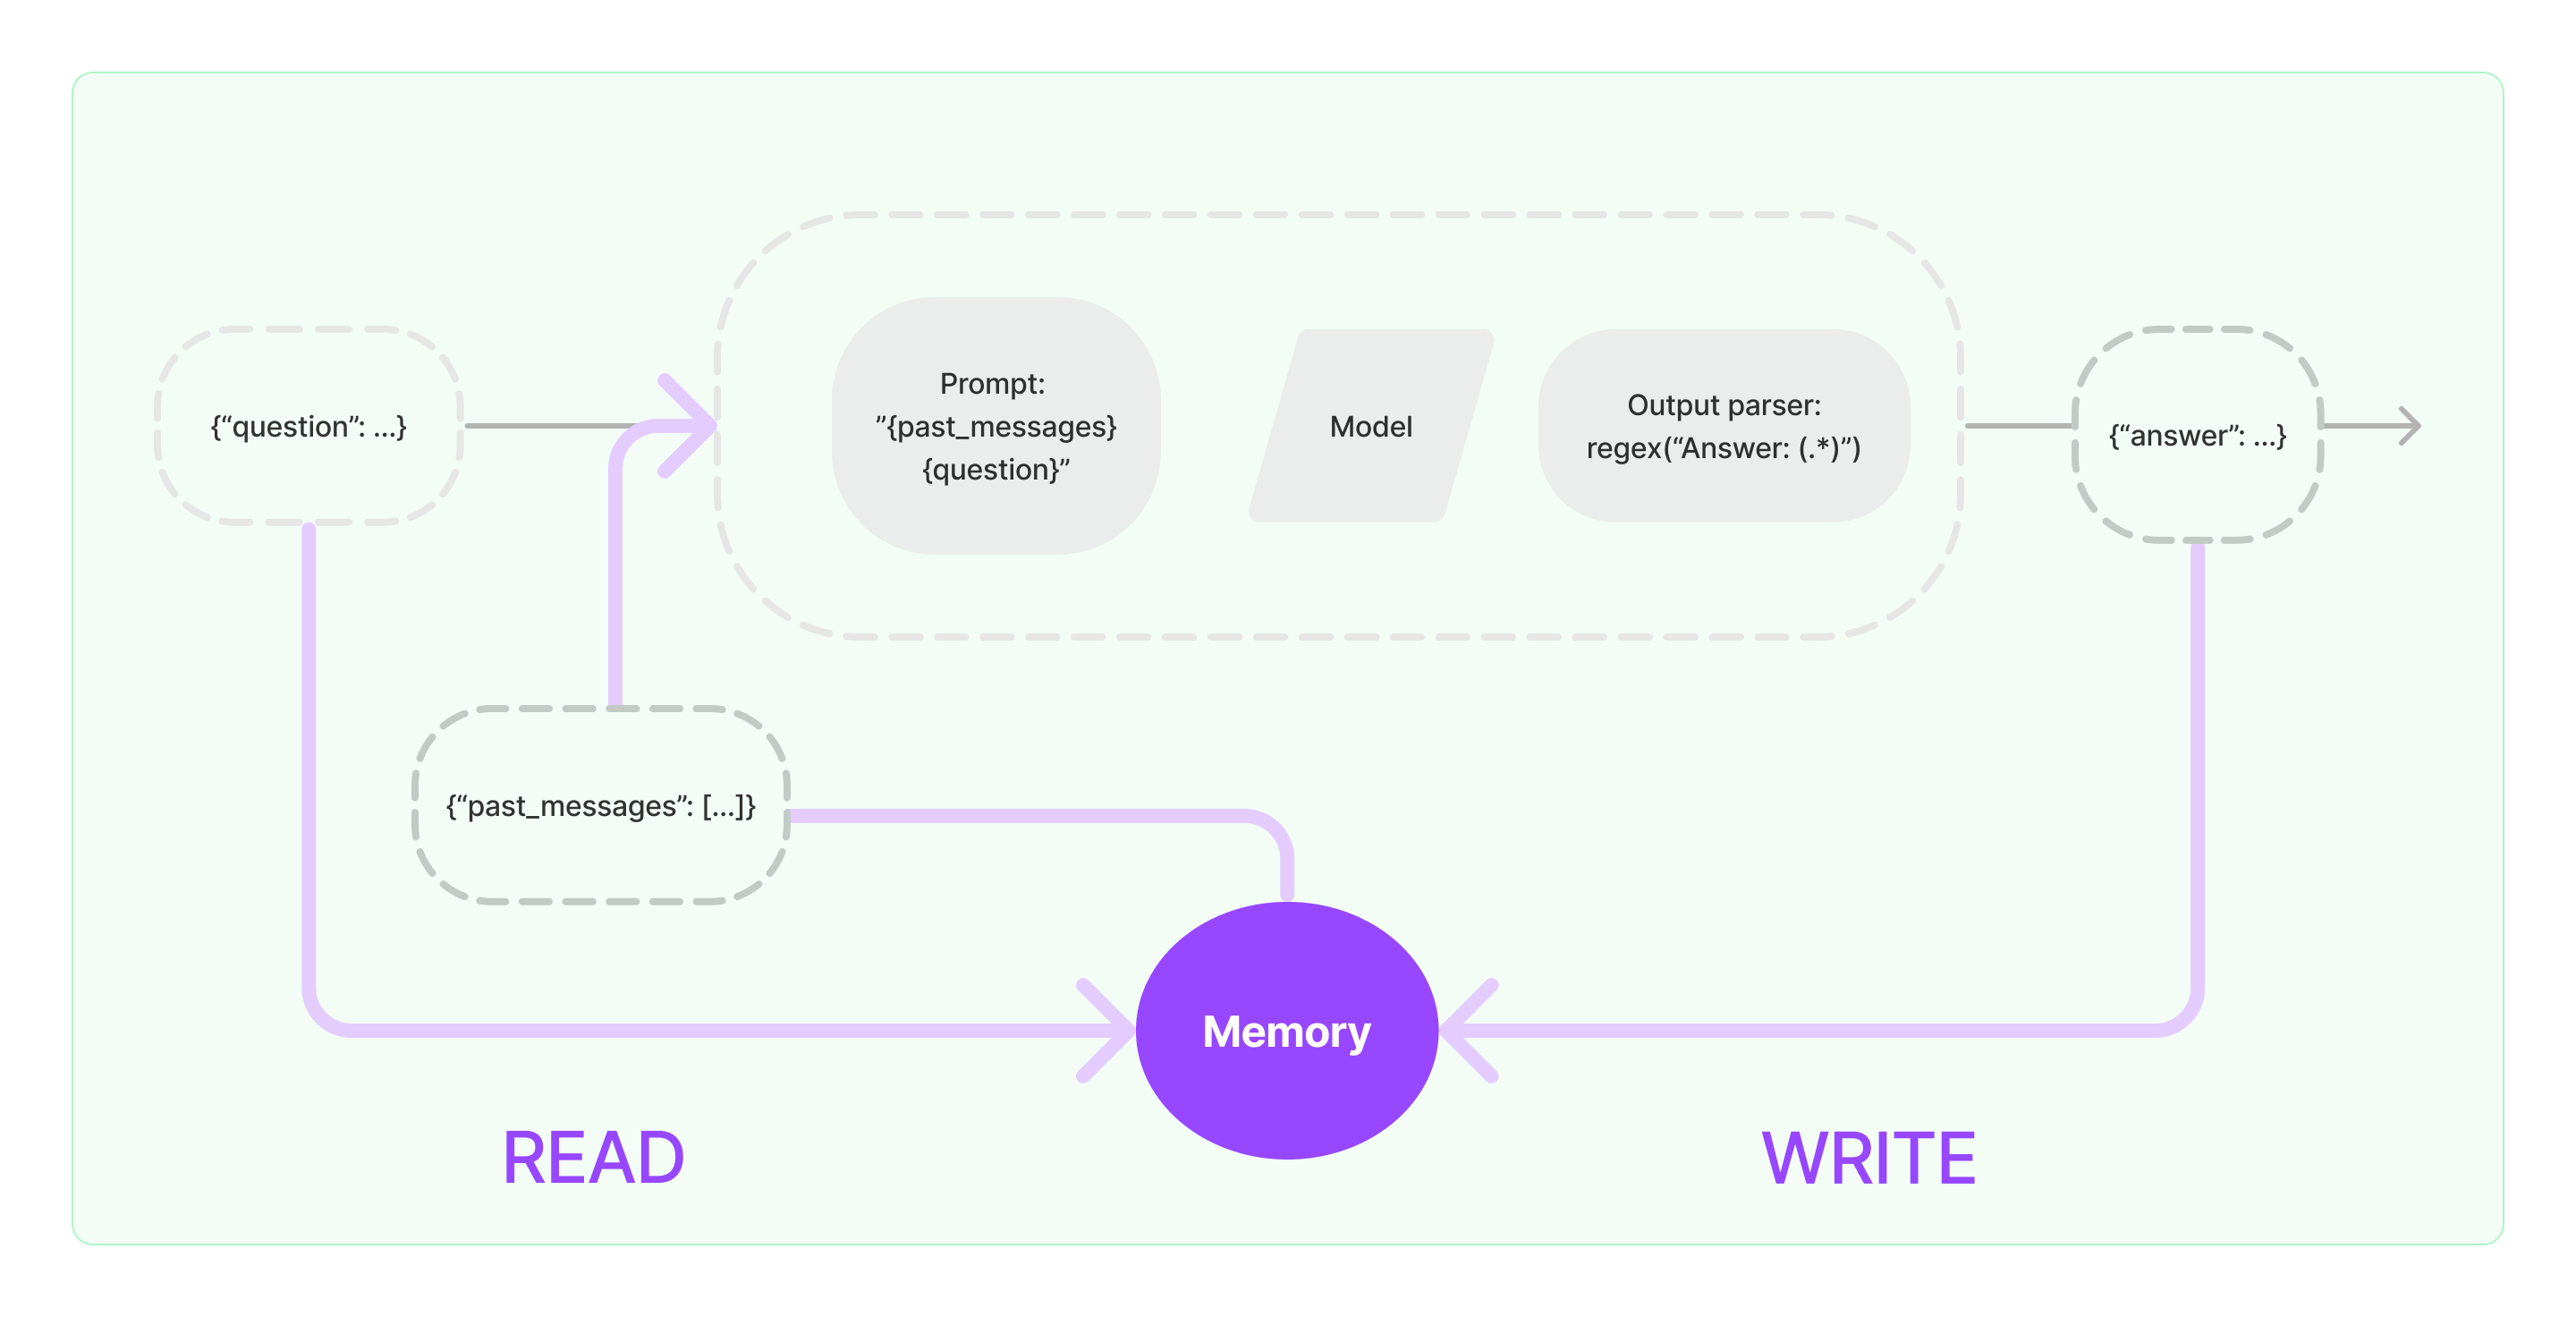

The `ConversationBufferMemory` is the most straightforward conversational memory in LangChain, which stores the raw input of the past conversation between the human and AI. ConversationBufferMemory is an extremely simple form of memory that just keeps a list of chat messages in a buffer and passes those into the prompt template.

In [81]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
memory.chat_memory.add_user_message("hi!")
memory.chat_memory.add_ai_message("which policy you need?")
memory.chat_memory

ChatMessageHistory(messages=[HumanMessage(content='hi!'), AIMessage(content='which policy you need?')])

In [82]:
# You can see what these variables are by calling
memory.load_memory_variables({})

{'history': 'Human: hi!\nAI: which policy you need?'}